In [ ]:
%tensorflow_version 1.x

TensorFlow is already loaded. Please restart the runtime to change versions.


#Section 1

In [ ]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.8.0


در ابتدا کتابخانه‌های لازم را ایمپورت میکنیم

In [ ]:
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
import numpy as np
from tensorflow import keras

سپس 300 دایره با استفاده از تابع زیر میسازیم.





In [ ]:
x, y = make_circles(n_samples=300, shuffle=True, noise=0.02)


In [ ]:
df = pd.DataFrame()
df["X"] = np.array(x[:,0])
df["Y"] = np.array(x[:,1])
df["label"] = np.array(y)
df

,X,Y,label
0,-0.498401,0.640677,1
1,-0.259368,-0.740119,1
2,0.790305,-0.611807,0
3,-0.867222,0.567081,0
4,-0.982512,-0.009384,0
...,...,...,...
295,0.281461,-0.947035,0
296,0.382796,0.943799,0
297,0.573146,-0.835093,0
298,-0.204963,0.814755,1


In [ ]:
print(df['X'].shape)

(300,)


برای مشاهده بهتر داده‌ها آنها را پلات میکنیم

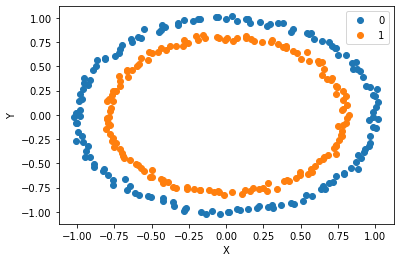

In [ ]:
groups = df.groupby("label")
for name, group in groups:
    plt.plot(group["X"], group["Y"], marker="o", linestyle="", label=name)
plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

داده‌ها را به دو دسته تست و آموزش تقسیم بندی میکنیم

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=10, train_size = .75)
print(X_train.shape , X_test.shape)

(225, 2) (75, 2)


In [ ]:
from keras.models import Sequential
from keras.layers import Dense , Flatten

در مرحله اول یک شبکه عصبی دلخواه بدون تابع فعال سازی میسازیم.
این شبکه من دو لایه پنهان به ترتیب با 100 و 80 نورون دارد.
خروجی آن هم یک نورون دارد که در واقع دو مقدار صفر یا یک را مشخص میکند.

In [ ]:
model = Sequential()
model.add(Dense(100, input_dim=2))
model.add(Dense(80))
model.add(Dense(1))

حال مدل را کامپایل میکنیم و یک تابع خطا به آن نسبت میدهیم.
در اینجا باینری کراس آنتروپی را انتخاب کردیم.
تنها متریک استفاده شده نیز صحت است.
سپس مدل را فیت میکنیم و همانطور که مشاهده میشود به دلیل عدم استفاده از توابع .فعال ساز مدل صحت بالایی ندارد و میانگین صحت آن 51 درصد در 30 ایپاک است

Epoch 1/30
8/8 [==============================] - 2s 8ms/step - loss: 4.0897 - accuracy: 0.4578
Epoch 2/30
8/8 [==============================] - 0s 3ms/step - loss: 3.7292 - accuracy: 0.4311
Epoch 3/30
8/8 [==============================] - 0s 2ms/step - loss: 3.4368 - accuracy: 0.4667
Epoch 4/30
8/8 [==============================] - 0s 3ms/step - loss: 1.3449 - accuracy: 0.4400
Epoch 5/30
8/8 [==============================] - 0s 3ms/step - loss: 0.7986 - accuracy: 0.4533
Epoch 6/30
8/8 [==============================] - 0s 3ms/step - loss: 0.8407 - accuracy: 0.4489
Epoch 7/30
8/8 [==============================] - 0s 3ms/step - loss: 0.8033 - accuracy: 0.4578
Epoch 8/30
8/8 [==============================] - 0s 3ms/step - loss: 0.7554 - accuracy: 0.4178
Epoch 9/30
8/8 [==============================] - 0s 3ms/step - loss: 0.7351 - accuracy: 0.3822
Epoch 10/30
8/8 [==============================] - 0s 3ms/step - loss: 0.7259 - accuracy: 0.3911
Epoch 11/30
8/8 [======================

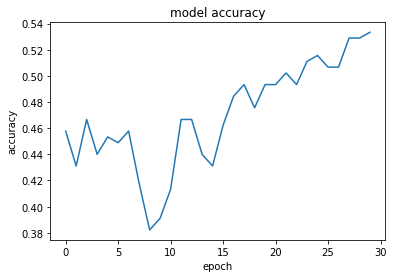

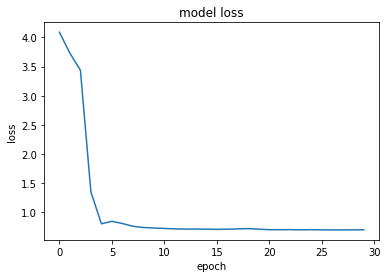

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=30)
_, test_accuracy1 = model.evaluate(X_train, y_train)
print('Accuracy: %.2f' % (test_accuracy1*100))

plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()


سپس مدل را روی داده های تست پردیکت میکنیم که باز هم همانطور که مشاهده میشود صحت 50 درصد را به ما میدهد که زیاد مورد قبول نیست

In [ ]:
predictions = (model.predict(X_test) > 0.5).astype(int)
true_predicts = 0
for i in range(len(predictions)):
  if(predictions[i] == y_test[i]):
    true_predicts+=1

test_accuracy = true_predicts/75
test_accuracy

0.5066666666666667

حال در مرحله بعدی به روی همان شبکه عصبی مرحله قبل توابع فعال ساز را اضافه میکنیم.
برای دو لایه پنهان از رلو و برای لایه آخر چون دسته بندی باینری است از سیگموید 
استفاده میکنیم

In [ ]:
model2 = Sequential()
model2.add(Dense(100, input_dim=2 , activation = 'relu'))
model2.add(Dense(80 , activation = 'relu'))
model2.add(Dense(1 , activation = 'sigmoid'))

حال مدل را کامپایل میکنیم و یک تابع خطا به آن نسبت میدهیم.
در اینجا باینری کراس آنتروپی را انتخاب کردیم.
تنها متریک استفاده شده نیز صحت است.
سپس مدل را فیت میکنیم و همانطور که مشاهده میشود در اینجا چون تایع فعال ساز را به شبکه خود اضافه کردیم میانگین صحت در 30 ایپاک به 60 درصد افزایش پیدا کرد

Epoch 1/30
8/8 [==============================] - 0s 3ms/step - loss: 0.6955 - accuracy: 0.4267
Epoch 2/30
8/8 [==============================] - 0s 4ms/step - loss: 0.6916 - accuracy: 0.5378
Epoch 3/30
8/8 [==============================] - 0s 3ms/step - loss: 0.6918 - accuracy: 0.5511
Epoch 4/30
8/8 [==============================] - 0s 3ms/step - loss: 0.6910 - accuracy: 0.6044
Epoch 5/30
8/8 [==============================] - 0s 3ms/step - loss: 0.6896 - accuracy: 0.5600
Epoch 6/30
8/8 [==============================] - 0s 3ms/step - loss: 0.6884 - accuracy: 0.5111
Epoch 7/30
8/8 [==============================] - 0s 3ms/step - loss: 0.6868 - accuracy: 0.5289
Epoch 8/30
8/8 [==============================] - 0s 2ms/step - loss: 0.6864 - accuracy: 0.5289
Epoch 9/30
8/8 [==============================] - 0s 3ms/step - loss: 0.6852 - accuracy: 0.5378
Epoch 10/30
8/8 [==============================] - 0s 3ms/step - loss: 0.6844 - accuracy: 0.5956
Epoch 11/30
8/8 [======================

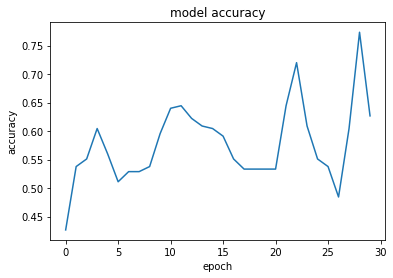

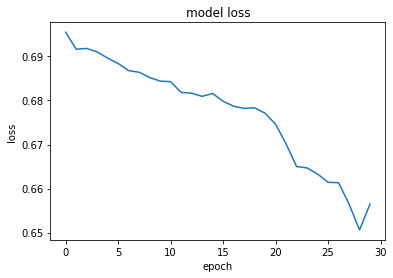

In [ ]:
model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history2 = model2.fit(X_train, y_train, epochs=30)
_, train_accuracy2 = model2.evaluate(X_train, y_train)
print('Accuracy: %.2f' % (train_accuracy2*100))

plt.plot(history2.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()
# summarize history for loss
plt.plot(history2.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

حال مدل را روی داده های تست پردیکت میکنیم. در اینجا نیز مدل توانست عملکرد بهتری 
از خود نشان دهد و به صحت 46 درصد روی داده های تست برسد که البته همچنان زیاد مورد قبول نیست و در مراحل بعدی با اعمال یک سری هایپرپارامترهای دیگر سعی میکنیم آنرا افزایش دهیم

In [ ]:
predictions2 = (model2.predict(X_test) > 0.5).astype(int)
true_predicts2 = 0
for i in range(len(predictions2)):
  if(predictions2[i] == y_test[i]):
    true_predicts2+=1

test_accuracy2 = true_predicts2/75
test_accuracy2

0.4666666666666667

در این مرحله ساختار شبکه عصبی همانند مرحله قبل است با این تفاوت که از یک تابع .خطا که مناسب مسائل رگرسیون است استفاده کرده ایم
چون مسئله ما از نوع مسئله رگرسیون است و از خطای مربوط به یک مسئله رگرسیون استفاده کردیم میانگین صحت هم روی داده های تست و آموزش نسبت به مرحله قبل افزایش یافته است
البته هنوز نمیتوان گفت صحت 70 درصد صحت خوبی است و میتوان آن را با عوض کردن مقادیری چون نرخ یادگیری و تعداد ایپاک های آموزش و افزایش نورون های لایه های پنهان افزایش داد

In [ ]:
model_r = Sequential()
model_r.add(Dense(100, input_dim=2 , activation = 'relu'))
model_r.add(Dense(80 , activation = 'relu'))
model_r.add(Dense(1 , activation = 'sigmoid'))

Epoch 1/30
8/8 [==============================] - 0s 3ms/step - loss: 0.2509 - accuracy: 0.4622
Epoch 2/30
8/8 [==============================] - 0s 3ms/step - loss: 0.2495 - accuracy: 0.5067
Epoch 3/30
8/8 [==============================] - 0s 2ms/step - loss: 0.2484 - accuracy: 0.5422
Epoch 4/30
8/8 [==============================] - 0s 2ms/step - loss: 0.2493 - accuracy: 0.6267
Epoch 5/30
8/8 [==============================] - 0s 3ms/step - loss: 0.2489 - accuracy: 0.5956
Epoch 6/30
8/8 [==============================] - 0s 3ms/step - loss: 0.2488 - accuracy: 0.5378
Epoch 7/30
8/8 [==============================] - 0s 4ms/step - loss: 0.2482 - accuracy: 0.5378
Epoch 8/30
8/8 [==============================] - 0s 3ms/step - loss: 0.2471 - accuracy: 0.5289
Epoch 9/30
8/8 [==============================] - 0s 3ms/step - loss: 0.2469 - accuracy: 0.5289
Epoch 10/30
8/8 [==============================] - 0s 2ms/step - loss: 0.2468 - accuracy: 0.5600
Epoch 11/30
8/8 [======================

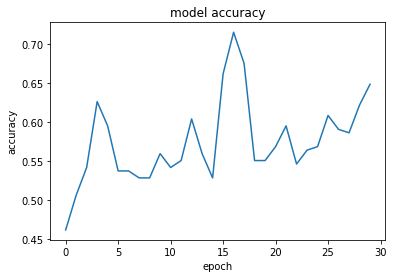

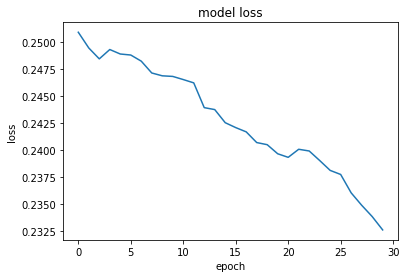

In [ ]:
model_r.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
history_r = model_r.fit(X_train, y_train, epochs=30)
_, train_accuracy_r = model_r.evaluate(X_train, y_train)
print('Accuracy: %.2f' % (train_accuracy_r*100))

plt.plot(history_r.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()
# summarize history for loss
plt.plot(history_r.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

In [ ]:
predictions_r = (model_r.predict(X_test) > 0.5).astype(int)
true_predicts_r = 0
for i in range(len(predictions_r)):
  if(predictions_r[i] == y_test[i]):
    true_predicts_r+=1

test_accuracy_r = true_predicts_r/75
test_accuracy_r

0.6

در این مرحله شبکه عصبی با یک لایه تعریف میکنیم که همانطور که مشخص است هم در داده های تست و هم آموزش بدتر نسبت به حالتی که چند لایه پنهان دارد عمل میکند
در کل برای دسته بندی داده های زیاد باید از چندین لایه پنهان برای عملکرد بهتر استفاده کنیم


In [ ]:
model3 = Sequential()
model3.add(Dense(100, input_dim=2 , activation = 'relu'))
model3.add(Dense(1 , activation = 'sigmoid'))

Epoch 1/30
8/8 [==============================] - 0s 2ms/step - loss: 0.2508 - accuracy: 0.4933
Epoch 2/30
8/8 [==============================] - 0s 3ms/step - loss: 0.2497 - accuracy: 0.5067
Epoch 3/30
8/8 [==============================] - 0s 2ms/step - loss: 0.2494 - accuracy: 0.5244
Epoch 4/30
8/8 [==============================] - 0s 3ms/step - loss: 0.2491 - accuracy: 0.5289
Epoch 5/30
8/8 [==============================] - 0s 2ms/step - loss: 0.2488 - accuracy: 0.5244
Epoch 6/30
8/8 [==============================] - 0s 4ms/step - loss: 0.2484 - accuracy: 0.5289
Epoch 7/30
8/8 [==============================] - 0s 3ms/step - loss: 0.2483 - accuracy: 0.5556
Epoch 8/30
8/8 [==============================] - 0s 2ms/step - loss: 0.2483 - accuracy: 0.5022
Epoch 9/30
8/8 [==============================] - 0s 2ms/step - loss: 0.2481 - accuracy: 0.5333
Epoch 10/30
8/8 [==============================] - 0s 4ms/step - loss: 0.2481 - accuracy: 0.5200
Epoch 11/30
8/8 [======================

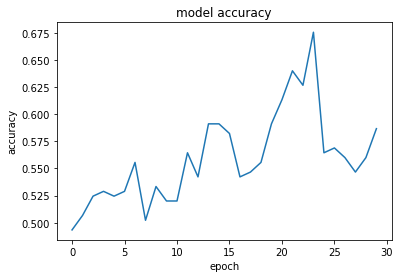

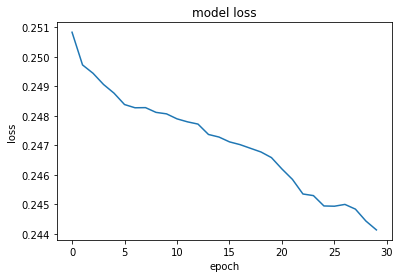

In [ ]:
model3.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
history3 = model3.fit(X_train, y_train, epochs=30)
_, train_accuracy3 = model3.evaluate(X_train, y_train)
print('Accuracy: %.2f' % (train_accuracy3*100))

plt.plot(history3.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()
# summarize history for loss
plt.plot(history3.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

In [ ]:
predictions3 = (model3.predict(X_test) > 0.5).astype(int)
true_predicts3 = 0
for i in range(len(predictions3)):
  if(predictions3[i] == y_test[i]):
    true_predicts3+=1

test_accuracy3 = true_predicts3/75
test_accuracy3

0.6933333333333334

در این مرحله روی همان شبکه عصبی مرحله قبل نرخ یادگیری را تنظیم میکنیم
در ابتدا با یک مقدار نه چندان بزرگ و نه چندان کوچک شروع میکنیم که همانطور که مشخص است تاثیر به سزایی در میانگین صحت هم در داده های تست و هم آموزش میگذارد

In [ ]:
from keras.optimizers import adam_v2
opt = adam_v2.Adam(learning_rate=0.01)

Epoch 1/30
8/8 [==============================] - 0s 3ms/step - loss: 0.2534 - accuracy: 0.4844
Epoch 2/30
8/8 [==============================] - 0s 2ms/step - loss: 0.2480 - accuracy: 0.5689
Epoch 3/30
8/8 [==============================] - 0s 2ms/step - loss: 0.2425 - accuracy: 0.6267
Epoch 4/30
8/8 [==============================] - 0s 2ms/step - loss: 0.2410 - accuracy: 0.6044
Epoch 5/30
8/8 [==============================] - 0s 2ms/step - loss: 0.2443 - accuracy: 0.5200
Epoch 6/30
8/8 [==============================] - 0s 2ms/step - loss: 0.2445 - accuracy: 0.4933
Epoch 7/30
8/8 [==============================] - 0s 3ms/step - loss: 0.2390 - accuracy: 0.5733
Epoch 8/30
8/8 [==============================] - 0s 3ms/step - loss: 0.2362 - accuracy: 0.5733
Epoch 9/30
8/8 [==============================] - 0s 3ms/step - loss: 0.2291 - accuracy: 0.7067
Epoch 10/30
8/8 [==============================] - 0s 2ms/step - loss: 0.2322 - accuracy: 0.6044
Epoch 11/30
8/8 [======================

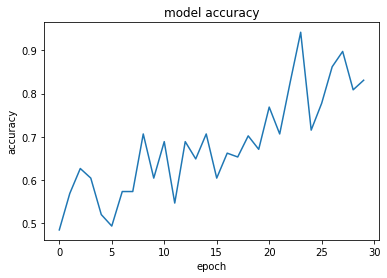

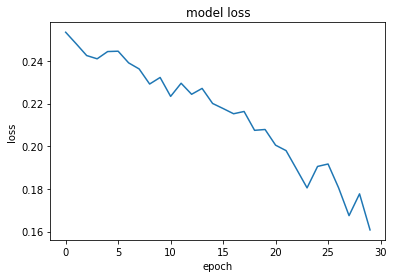

In [ ]:
model4 = Sequential()
model4.add(Dense(100, input_dim=2 , activation = 'relu'))
model4.add(Dense(1 , activation = 'sigmoid'))

model4.compile(loss='mean_squared_error', optimizer=opt, metrics=['accuracy'])
history4 = model4.fit(X_train, y_train, epochs=30)
_, train_accuracy4 = model4.evaluate(X_train, y_train)
print('Accuracy: %.2f' % (train_accuracy4*100))

plt.plot(history4.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()
# summarize history for loss
plt.plot(history4.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

In [ ]:
predictions4 = (model4.predict(X_test) > 0.5).astype(int)
true_predicts4 = 0
for i in range(len(predictions4)):
  if(predictions4[i] == y_test[i]):
    true_predicts4+=1

test_accuracy4 = true_predicts4/75
test_accuracy4

0.8133333333333334

در این مرحله عدد بزرگتری را برای نرخ یادگیری انتخاب میکنیم. که بدتر از حالت قبلی عمل کرد زیرا نرخ یادگیری بزرگ سبب واگرایی مدل میشود

In [ ]:
opt2 = adam_v2.Adam(lr=0.5)



/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/30
8/8 [==============================] - 0s 2ms/step - loss: 0.5255 - accuracy: 0.4044
Epoch 2/30
8/8 [==============================] - 0s 2ms/step - loss: 0.5333 - accuracy: 0.4667
Epoch 3/30
8/8 [==============================] - 0s 2ms/step - loss: 0.5333 - accuracy: 0.4667
Epoch 4/30
8/8 [==============================] - 0s 2ms/step - loss: 0.5333 - accuracy: 0.4667
Epoch 5/30
8/8 [==============================] - 0s 2ms/step - loss: 0.5333 - accuracy: 0.4667
Epoch 6/30
8/8 [==============================] - 0s 2ms/step - loss: 0.5333 - accuracy: 0.4667
Epoch 7/30
8/8 [==============================] - 0s 2ms/step - loss: 0.5333 - accuracy: 0.4667
Epoch 8/30
8/8 [==============================] - 0s 2ms/step - loss: 0.5333 - accuracy: 0.4667
Epoch 9/30
8/8 [==============================] - 0s 2ms/step - loss: 0.5333 - accuracy: 0.4667
Epoch 10/30
8/8 [==============================] - 0s 3ms/step - loss: 0.5333 - accuracy: 0.4667
Epoch 11/30
8/8 [======================

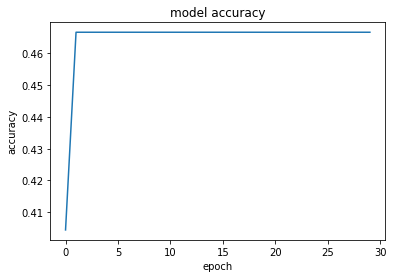

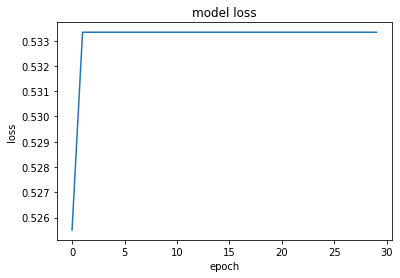

In [ ]:
model4_1 = Sequential()
model4_1.add(Dense(100, input_dim=2 , activation = 'relu'))
model4_1.add(Dense(1 , activation = 'sigmoid'))

model4_1.compile(loss='mean_squared_error', optimizer=opt2, metrics=['accuracy'])
history4_1 = model4_1.fit(X_train, y_train, epochs=30)
_, train_accuracy4_1 = model4_1.evaluate(X_train, y_train)
print('Accuracy: %.2f' % (train_accuracy4_1*100))

plt.plot(history4_1.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()
# summarize history for loss
plt.plot(history4_1.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

In [ ]:
predictions4_1 = (model4_1.predict(X_test) > 0.5).astype(int)
true_predicts4_1 = 0
for i in range(len(predictions4_1)):
  if(predictions4_1[i] == y_test[i]):
    true_predicts4_1+=1

test_accuracy4_1 = true_predicts4_1/75
test_accuracy4_1

0.6

حال یک عدد خیلی کوچک را برای نرخ یادگیری تست میکنیم
برای رخ های یادگیری کوچک قدم های مدل کند است و در نتیجه اگر بخواهیم عملکرد بهتری داشته باشد باید ایپاک ها را بالا ببریم پس بهترین عدد همان 0.01 است

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/30
8/8 [==============================] - 1s 4ms/step - loss: 0.2501 - accuracy: 0.5022
Epoch 2/30
8/8 [==============================] - 0s 4ms/step - loss: 0.2500 - accuracy: 0.5111
Epoch 3/30
8/8 [==============================] - 0s 5ms/step - loss: 0.2500 - accuracy: 0.5067
Epoch 4/30
8/8 [==============================] - 0s 4ms/step - loss: 0.2500 - accuracy: 0.5111
Epoch 5/30
8/8 [==============================] - 0s 6ms/step - loss: 0.2499 - accuracy: 0.5200
Epoch 6/30
8/8 [==============================] - 0s 5ms/step - loss: 0.2499 - accuracy: 0.5200
Epoch 7/30
8/8 [==============================] - 0s 4ms/step - loss: 0.2499 - accuracy: 0.5244
Epoch 8/30
8/8 [==============================] - 0s 5ms/step - loss: 0.2499 - accuracy: 0.5289
Epoch 9/30
8/8 [==============================] - 0s 4ms/step - loss: 0.2499 - accuracy: 0.5289
Epoch 10/30
8/8 [==============================] - 0s 4ms/step - loss: 0.2499 - accuracy: 0.5378
Epoch 11/30
8/8 [======================

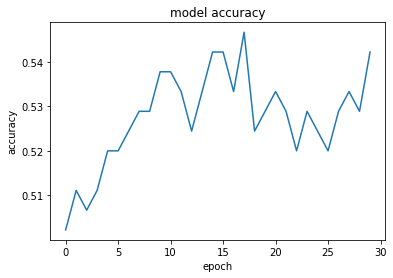

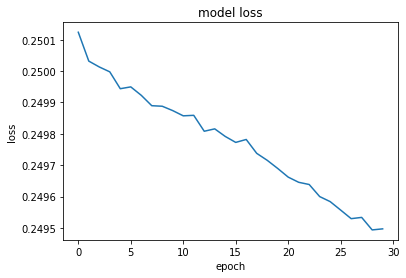

In [ ]:
opt3 = adam_v2.Adam(lr=0.0001)

model4_2 = Sequential()
model4_2.add(Dense(100, input_dim=2 , activation = 'relu'))
model4_2.add(Dense(1 , activation = 'sigmoid'))

model4_2.compile(loss='mean_squared_error', optimizer=opt3, metrics=['accuracy'])
history4_2 = model4_2.fit(X_train, y_train, epochs=30)
_, train_accuracy4_2 = model4_2.evaluate(X_train, y_train)
print('Accuracy: %.2f' % (train_accuracy4_2*100))

plt.plot(history4_2.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()
# summarize history for loss
plt.plot(history4_2.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

In [ ]:
predictions4_2 = (model4_2.predict(X_test) > 0.5).astype(int)
true_predicts4_2 = 0
for i in range(len(predictions4_2)):
  if(predictions4_2[i] == y_test[i]):
    true_predicts4_2+=1

test_accuracy4_2 = true_predicts4_2/75
test_accuracy4_2

0.48

در نهایت شبکه عصبی مناسب را میسازیم که شامل دو لایه با نورونهای 100 و 80 و نرخ یادگیری 0.01 و تابع خطای مربوط به مسائل رگرسیون است که بسیار در میانگین صحت تاثیر داشته به صحت 100 درصد روی داده های تست و آموزش میرسیم

Epoch 1/30


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


8/8 [==============================] - 0s 3ms/step - loss: 0.2710 - accuracy: 0.4933
Epoch 2/30
8/8 [==============================] - 0s 3ms/step - loss: 0.2463 - accuracy: 0.5644
Epoch 3/30
8/8 [==============================] - 0s 3ms/step - loss: 0.2459 - accuracy: 0.5200
Epoch 4/30
8/8 [==============================] - 0s 3ms/step - loss: 0.2409 - accuracy: 0.5689
Epoch 5/30
8/8 [==============================] - 0s 4ms/step - loss: 0.2377 - accuracy: 0.5867
Epoch 6/30
8/8 [==============================] - 0s 3ms/step - loss: 0.2450 - accuracy: 0.6044
Epoch 7/30
8/8 [==============================] - 0s 3ms/step - loss: 0.2225 - accuracy: 0.6711
Epoch 8/30
8/8 [==============================] - 0s 2ms/step - loss: 0.2063 - accuracy: 0.7200
Epoch 9/30
8/8 [==============================] - 0s 3ms/step - loss: 0.1953 - accuracy: 0.7733
Epoch 10/30
8/8 [==============================] - 0s 3ms/step - loss: 0.1838 - accuracy: 0.7689
Epoch 11/30
8/8 [==============================] -

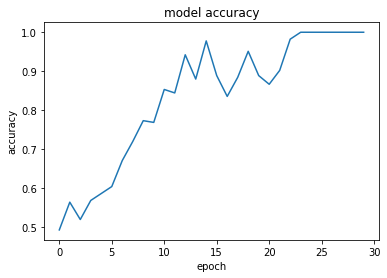

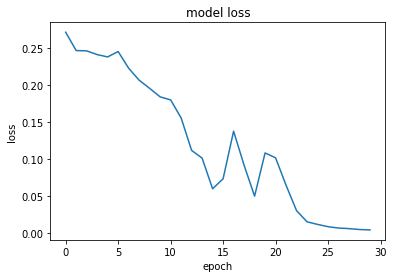

In [ ]:
opt_final = adam_v2.Adam(lr=0.01)

model5 = Sequential()
model5.add(Dense(100, input_dim=2 , activation = 'relu'))
model5.add(Dense(80, activation = 'relu'))
model5.add(Dense(1 , activation = 'sigmoid'))

model5.compile(loss='mean_squared_error', optimizer=opt, metrics=['accuracy'])
history5 = model5.fit(X_train, y_train, epochs=30)
_, train_accuracy5 = model5.evaluate(X_train, y_train)
print('Accuracy: %.2f' % (train_accuracy5*100))

plt.plot(history5.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()
# summarize history for loss
plt.plot(history5.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

In [ ]:
predictions5 = (model5.predict(X_test) > 0.5).astype(int)
true_predicts5 = 0
for i in range(len(predictions4)):
  if(predictions5[i] == y_test[i]):
    true_predicts5+=1

test_accuracy5 = true_predicts5/75
test_accuracy5

1.0

# Section2

In [ ]:
from keras.datasets import fashion_mnist
from sklearn.metrics import plot_confusion_matrix, ConfusionMatrixDisplay, confusion_matrix

In [ ]:
(trainX, trainy), (testX, testy) = fashion_mnist.load_data()
print('Train: X=%s, y=%s' % (trainX.shape, trainy.shape))
print('Test: X=%s, y=%s' % (testX.shape, testy.shape))

4431872/4422102 [==============================] - 0s 0us/step
Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


In [ ]:
trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
testX = testX.reshape((testX.shape[0], 28, 28, 1))

trainy = trainy.reshape((trainy.shape[0] , 1))
testy = testy.reshape((testy.shape[0] , 1))

print('Train: X=%s, y=%s' % (trainX.shape, trainy.shape))
print('Test: X=%s, y=%s' % (testX.shape, testy.shape))

Train: X=(60000, 28, 28, 1), y=(60000, 1)
Test: X=(10000, 28, 28, 1), y=(10000, 1)


In [ ]:
# Normalize
train_norm = trainX / 255.0
test_norm = testX / 255.0

In [ ]:
from tensorflow.keras.utils import to_categorical

In [ ]:
trainy = to_categorical(trainy, dtype ="uint8")
testy = to_categorical(testy, dtype ="uint8")

In [ ]:
opt_final = adam_v2.Adam(lr=0.01)

model_mnist = Sequential()
model_mnist.add(Dense(100, input_shape=(28, 28, 1) , activation = 'relu'))
model_mnist.add(Dense(150 , activation = 'relu'))
model_mnist.add(Flatten())
model_mnist.add(Dense(10 , activation = 'softmax'))

model_mnist.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_26 (Dense)            (None, 28, 28, 100)       200       
                                                                 
 dense_27 (Dense)            (None, 28, 28, 150)       15150     
                                                                 
 flatten (Flatten)           (None, 117600)            0         
                                                                 
 dense_28 (Dense)            (None, 10)                1176010   
                                                                 
Total params: 1,191,360
Trainable params: 1,191,360
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
model_mnist.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
history_mnist = model_mnist.fit(trainX, trainy, epochs=30)
_, train_accuracy_mnist = model_mnist.evaluate(trainX, trainy)
print('Accuracy: %.2f' % (train_accuracy_mnist*100))

Epoch 1/30
1875/1875 [==============================] - 149s 79ms/step - loss: 0.3505 - accuracy: 0.8708
Epoch 2/30
1875/1875 [==============================] - 148s 79ms/step - loss: 0.3500 - accuracy: 0.8712
Epoch 3/30
1875/1875 [==============================] - 147s 78ms/step - loss: 0.3523 - accuracy: 0.8700
Epoch 4/30
1875/1875 [==============================] - 147s 78ms/step - loss: 0.3515 - accuracy: 0.8713
Epoch 5/30
1875/1875 [==============================] - 147s 78ms/step - loss: 0.3511 - accuracy: 0.8708
Epoch 6/30
1875/1875 [==============================] - 147s 79ms/step - loss: 0.3517 - accuracy: 0.8714
Epoch 7/30
1875/1875 [==============================] - 147s 78ms/step - loss: 0.3496 - accuracy: 0.8717
Epoch 8/30
1875/1875 [==============================] - 149s 79ms/step - loss: 0.3497 - accuracy: 0.8709
Epoch 9/30
1875/1875 [==============================] - 149s 80ms/step - loss: 0.3480 - accuracy: 0.8717
Epoch 10/30
1875/1875 [==============================] 

In [ ]:
# model_mnist.save('saved_model/model_mnist')

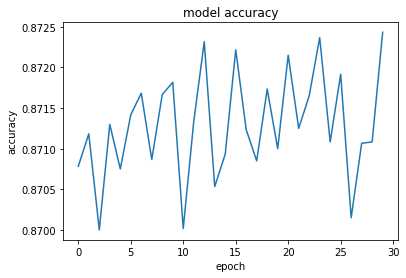

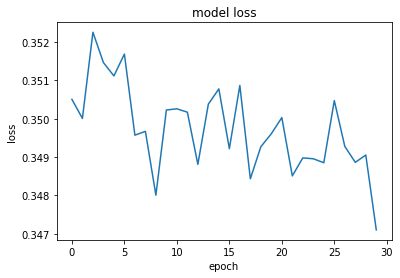

In [ ]:
plt.plot(history_mnist.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()
# summarize history for loss
plt.plot(history_mnist.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

In [ ]:
#Make predictions
y_probs = model_mnist.predict(testX)

#Convert prediction probabilities into integers
y_preds = y_probs.argmax(axis=1)
rounded_labels=np.argmax(testy, axis=1)
true_predict = 0


In [ ]:
# پس از رسم ماتریس درهم ریختگی میتوان متوجه شد که مدل در تشخیص لباسهای شبیه به هم مثل  
# tshirt و shirt
# coat , pullover
# shirt , coat
# shirt , pullover
# sneakers , boot 
# تشخیص اشتباه داشته است ولی به طور کلی عملکرد خوبی داشته است.

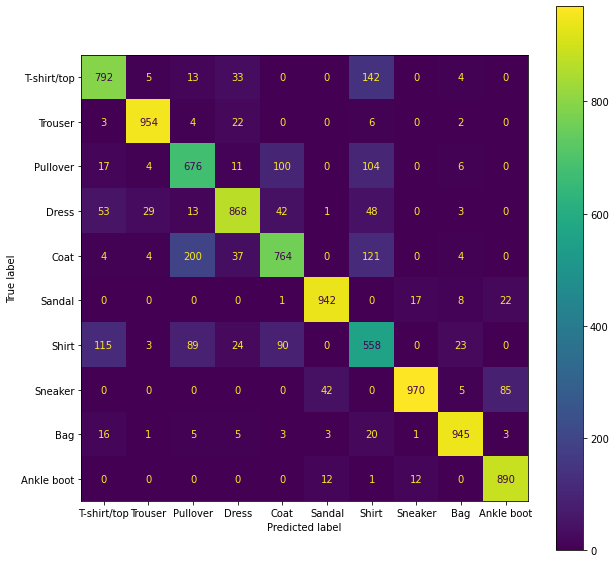

In [ ]:
label_names = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]
#Confusion matrix
cm=confusion_matrix(y_preds,rounded_labels)
#Plot
disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=label_names)
fig, ax = plt.subplots(figsize=(10,10))
disp.plot(ax=ax);